<center><h1>Real Time First Price Auctions</h1></center>

<B>Name -</B> Rahul Gaikwad

<B>Position -</B> Data Scientist

<B>Interview Round -</B> 2 - Modelling Exercise

<B>Email Id -</B> rahul.gaikwad2010@gmail.com

<B>Mobile No. -</B> +91 9326117192

<hr/>

### Introduction

60% of the digital ad inventory is sold by publishers in **Real-Time first price Auctions.** Once a user lands on a webpage, bidders (advertisers) bid for different ad slots on the page, and the one with the highest winning bid displays their ad in the ad space and pays the amount he bid. This process encourages bid shading – bidding lesser than the perceived value of the ad space to maximize utilization for self while maintaining a particular win rate at the lowest prices. 

Hence, for publishers, it becomes important to value their inventory (all the users that visit their website * all the ad slots they have on their websites) correctly so that a reserve price or a minimum price can be set up for the auctions. The minimum price

<hr/>

### Problem Statement

In a first-price auction, the highest bidder wins and pays the price they bid if it exceeds the reserve price. The optimal strategy of a bidder is to shade their bids (bid less than their true value of the inventory). However, the bidder needs to win a certain amount to achieve their goals. This 
suggests they need to shade as much as possible while maintaining a certain win rate.

A bidder perceives a certain value out of every impression they win. Each bidder would like to 
maintain the value they derived out of this set of websites (given in the dataset) in June with a 
the maximum deviation of 20%. 

Setting a reserve price induces this by causing bidders to lose at lower bids which encourages higher bidding and more publisher revenue. However, since most of these take place through 
automated systems, there might be an unknown delay in setting reserve prices & reducing the win rate of bidder & bidder changing their bid shading algorithm & increased publisher revenue.

<hr/>

### Questions
1. What are the reserve prices that he/she can set? 
2. What is the potential revenue range our publisher can make in July? (Changelog - consider is_weekend column for question 1.)

<hr/>

# 1. Setting the stage

1. Import necessary libraries
2. Load dataset
3. Data Preprocessing
<hr/>

### 1.1 Import necessary libraries

In [1]:
# Data representation and computation
import pandas as pd  
import numpy as np  
pd.options.display.float_format = '{:20,.4f}'.format

# Graph plotting
import matplotlib.pyplot as plt  
import seaborn as sns

# Data splitting, feature engg., and pipeline to train machine learning models
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cluster, silhouette_score, v_measure_score, adjusted_rand_score, completeness_score

# Machine learning models
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Miscellaneous
import warnings
from math import log, e, ceil
from scipy.stats import entropy
from prettytable import PrettyTable

# Declaration
warnings.filterwarnings('ignore')
%precision 2
%matplotlib inline
sns.set(font_scale=1)

<br><hr/>

### 1.2 Load Data

In [2]:
# The data is of a particular month and the number of impressions that happened in that month. 
# To read the data as a time series, we have to pass special arguments to the read_csv command:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')

ldf_ad_data = pd.read_csv('../input/real-time-first-price-auctions/Ascendeum_Dataset2.csv', parse_dates=['date'], date_parser=dateparse)
ldf_ad_data.head()

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
0,2019-06-30,351,10,187,2,84,3473,19,60,1,4,5174,16,0.0000,2,16,1
1,2019-06-30,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0000,0,6,1
2,2019-06-30,351,10,147,2,84,3473,19,60,1,4,5174,4,0.0000,0,4,1
3,2019-06-30,351,10,147,2,84,3473,19,58,1,4,5174,4,0.0000,0,4,1
4,2019-06-30,348,10,147,3,79,3463,20,59,1,19,5138,4,0.0000,0,4,1


<br><hr/>

### 1.3. Data Preprocessing

> Here we'll quickly describe a dataset; the number of rows/columns, missing data, data types, preview, etc.

In [3]:
ldf_ad_data.shape

(567291, 17)

In [4]:
ldf_ad_data.describe()

,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
count,"567,291.0000","567,291.0000","567,291.0000","567,291.0000","567,291.0000","567,291.0000","567,291.0000","567,291.0000","567,291.0000","567,291.0000","567,291.0000","567,291.0000","567,291.0000","567,291.0000","567,291.0000","567,291.0000"
mean,347.1078,10.2206,110.2261,1.8997,262.0843,"1,951.2737",12.6321,57.2172,1.0000,14.4337,"5,136.4366",33.6737,0.0697,12.8383,32.1528,1.0000
std,2.9304,1.2229,66.1778,0.7920,627.3255,"1,652.5457",6.8126,1.9560,0.0000,7.1359,62.5086,220.8654,0.7136,101.9892,207.0965,0.0000
min,342.0000,10.0000,1.0000,1.0000,8.0000,45.0000,3.0000,15.0000,1.0000,1.0000,"5,050.0000",0.0000,-0.1542,0.0000,0.0000,1.0000
25%,345.0000,10.0000,39.0000,1.0000,79.0000,45.0000,4.0000,56.0000,1.0000,4.0000,"5,099.0000",0.0000,0.0000,0.0000,0.0000,1.0000
50%,346.0000,10.0000,122.0000,2.0000,88.0000,"3,438.0000",11.0000,57.0000,1.0000,19.0000,"5,127.0000",2.0000,0.0000,0.0000,2.0000,1.0000
75%,350.0000,10.0000,183.0000,3.0000,139.0000,"3,460.0000",19.0000,58.0000,1.0000,19.0000,"5,168.0000",6.0000,0.0054,2.0000,6.0000,1.0000
max,351.0000,17.0000,308.0000,5.0000,"2,646.0000","3,489.0000",20.0000,60.0000,1.0000,21.0000,"5,443.0000","14,452.0000",83.8220,"7,392.0000","13,756.0000",1.0000


In [5]:
ldf_ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     567291 non-null  datetime64[ns]
 1   site_id                  567291 non-null  int64         
 2   ad_type_id               567291 non-null  int64         
 3   geo_id                   567291 non-null  int64         
 4   device_category_id       567291 non-null  int64         
 5   advertiser_id            567291 non-null  int64         
 6   order_id                 567291 non-null  int64         
 7   line_item_type_id        567291 non-null  int64         
 8   os_id                    567291 non-null  int64         
 9   integration_type_id      567291 non-null  int64         
 10  monetization_channel_id  567291 non-null  int64         
 11  ad_unit_id               567291 non-null  int64         
 12  total_impression

In [6]:
ldf_ad_data.isna().sum()

date                       0
site_id                    0
ad_type_id                 0
geo_id                     0
device_category_id         0
advertiser_id              0
order_id                   0
line_item_type_id          0
os_id                      0
integration_type_id        0
monetization_channel_id    0
ad_unit_id                 0
total_impressions          0
total_revenue              0
viewable_impressions       0
measurable_impressions     0
revenue_share_percent      0
dtype: int64

Before going further, we will make out the reason behind choosing the measurable impressions over total impressions.

By definition:
- total_impressions - measurement column measuring the impressions for the particular set of dimensions

- viewable_impressions - Number of impressions on the site that were viewable out of all measurable impressions. A display ad is counted as viewable if at least 50% of its area  was displayed on screen for at least one second

- measurable_impressions - Impressions that were measurable by Active View out of the total number of eligible impressions. This value should generally be close to 100%. For example, an impression that is rendering in a cross-domain iframe may not be measurable.

That means the total impression represents superset. But the measurable impression is successful impressions amongst the total.

In [7]:
# consider total impression is 100%

impression_stats = PrettyTable()
impression_stats.field_names = ["Total","Viewable","Measurable"]
impression_stats.align[""] = "r"
impression_stats.add_row(["100%",
                          "%.2f"%((sum(ldf_ad_data['viewable_impressions'])/sum(ldf_ad_data['total_impressions']))*100),
                          "%.2f"%((sum(ldf_ad_data['measurable_impressions'])/sum(ldf_ad_data['total_impressions']))*100)])
print("Impression Report\n")
print(impression_stats)

Impression Report

+-------+----------+------------+
| Total | Viewable | Measurable |
+-------+----------+------------+
|  100% |  38.13   |   95.48    |
+-------+----------+------------+


The above table shows that the rate of eligible impression is **97.25%.** Hence, we will stick to the measurable impression for further calculations.

#### Dealing with outliers

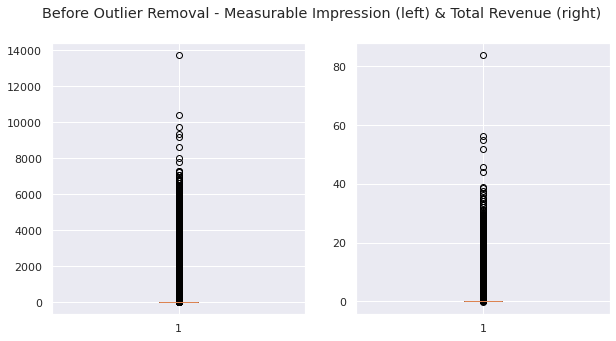

In [8]:
fig, axs = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('Before Outlier Removal - Measurable Impression (left) & Total Revenue (right)')
axs[0].boxplot(ldf_ad_data.measurable_impressions);
axs[1].boxplot(ldf_ad_data.total_revenue);

In [9]:
#remove the outliers 
ldf_ad_data = ldf_ad_data[ldf_ad_data['total_revenue'].between(ldf_ad_data['total_revenue'].quantile(.05), ldf_ad_data['total_revenue'].quantile(.95))]
ldf_ad_data = ldf_ad_data[ldf_ad_data['measurable_impressions'].between(ldf_ad_data['measurable_impressions'].quantile(.05), ldf_ad_data['measurable_impressions'].quantile(.95))]

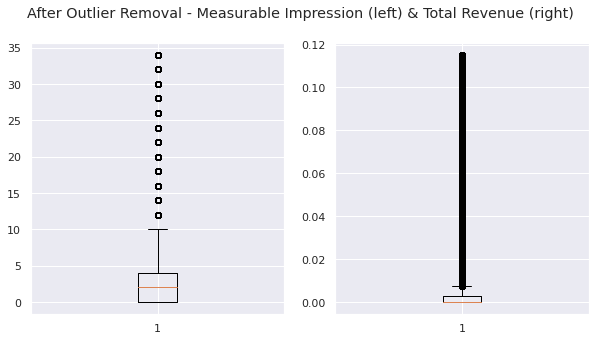

In [10]:
fig, axs = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('After Outlier Removal - Measurable Impression (left) & Total Revenue (right)')
axs[0].boxplot(ldf_ad_data.measurable_impressions);
axs[1].boxplot(ldf_ad_data.total_revenue);

From these pieces of information, we can see that some features won't be relevant in our exploratory analysis as mentioned in the documentation (such as order_id, line_item_type_id & Revenue_share_percent). Plus there are so many features to analyze that it may be better to concentrate on the ones which can give us real insights. Let's just remove them.

In [11]:
shortlisted_columns = ['date',
 'site_id',
 'ad_type_id',
 'geo_id',
 'device_category_id',
 'advertiser_id',
 'os_id',
 'ad_unit_id',
 'total_impressions',
 'total_revenue',
 'viewable_impressions',
 'measurable_impressions']

ldf_ad_data = ldf_ad_data[shortlisted_columns]

<hr/>

# 2. Exploratory Data Analysis (EDA)

The purpose of this EDA is to find insights that will serve us later for Data cleaning/preparation/transformation which will ultimately be used into a machine learning algorithm.

1. EDA of **Date** Variable
2. EDA of Remaining Variables

<hr/>

In [12]:
def plot_dual_graph(x, y1, y2, figsize = (15,7)):
    """
    This method is used to plot dual graph by accepting three params:
    :param1 - x = x-axis
    :param2 - y1 = y1-axis(left) - Calculate & Plot Mean 
    :param3 - y2 = y2-axis(right) - Calculate & Plot count
    """
    fig, axes = plt.subplots(nrows=1,ncols=1,figsize=figsize)

    ldf_avg_loss_amount_per_x =  ldf_ad_data.groupby(x)[y1].mean().to_frame(name = y1).reset_index()
    ldf_avg_claims_per_x =  ldf_ad_data.groupby(x)[y2].count().to_frame(name = y2).reset_index()
    ldf_day_wise = ldf_avg_loss_amount_per_x.merge(ldf_avg_claims_per_x)

    ldf_day_wise[[y2]].plot(kind = "bar", color=["c"], ax=axes, label="A")
    axes.set_ylabel("# "+str(y2), fontsize=15)
    axes.set_xlabel(x, fontsize=15)

    ax2 = axes.twinx()
    ax2.set_ylabel("Average "+str(y1), fontsize=15)
    ldf_day_wise[[y1]].plot(linestyle='-', marker='o', color=["r"], ax=ax2, label="B")

    plt.title(" & ".join(x)+" vs # "+str(y2)+" (left) & Average "+str(y1)+" (right)", fontsize=15)
    plt.grid(which='major', linestyle='-', linewidth='0.2', color='black')
    plt.show()

    return ldf_day_wise

### 2.1 EDA of Date Variable

In [13]:
start_date = ldf_ad_data["date"].min()
end_date = ldf_ad_data["date"].max()

print("First date in dataset - "+str(start_date))
print("Last date in dataset - "+str(end_date))
print("No. of Days Present - "+str(end_date-start_date))

First date in dataset - 2019-06-01 00:00:00
Last date in dataset - 2019-06-30 00:00:00
No. of Days Present - 29 days 00:00:00


Now, if we observe the above statements, the date has only 29 days. So, what we’ll do is, we'll analyze impression & revenue data day-wise & week-wise.

##### Day wise

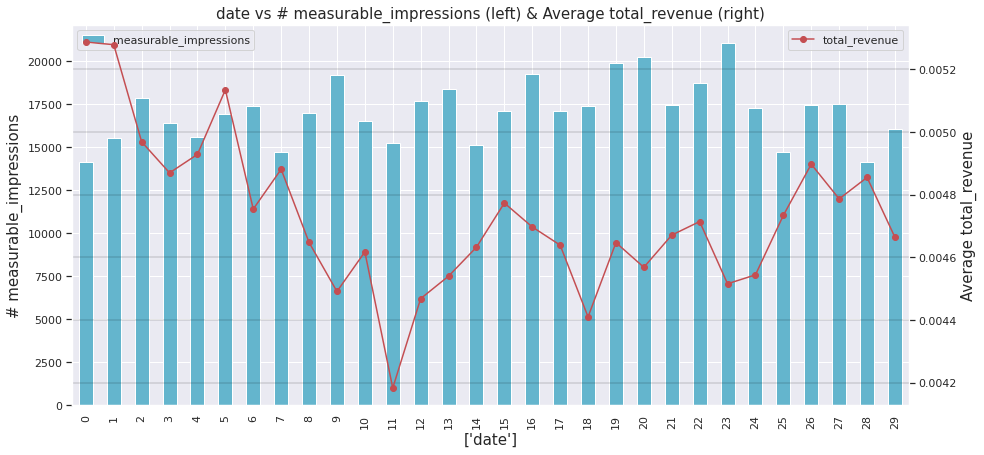

,date,total_revenue,measurable_impressions
0,2019-06-01,0.0053,14145
1,2019-06-02,0.0053,15550
2,2019-06-03,0.0050,17854
3,2019-06-04,0.0049,16416
4,2019-06-05,0.0049,15607
5,2019-06-06,0.0051,16933
6,2019-06-07,0.0048,17428
7,2019-06-08,0.0049,14697
8,2019-06-09,0.0046,16966
9,2019-06-10,0.0045,19191


In [14]:
plot_dual_graph(x = ['date'], y1 = 'total_revenue', y2 = 'measurable_impressions', figsize=(15,7))

As seen above, there was an equal distribution of revenue amount as well as measurable impressions throughout the month (day-wise). We cannot completely understand the distribution without magnifying the data. Let's see if we can see any trends week-wise
<hr/>

##### Week-wise
> Determine Week using iso calender & store them in WeekNo column

In [15]:
ldf_ad_data["WeekNo"] = ldf_ad_data.apply(lambda x: x["date"].isocalendar()[1], axis=1)

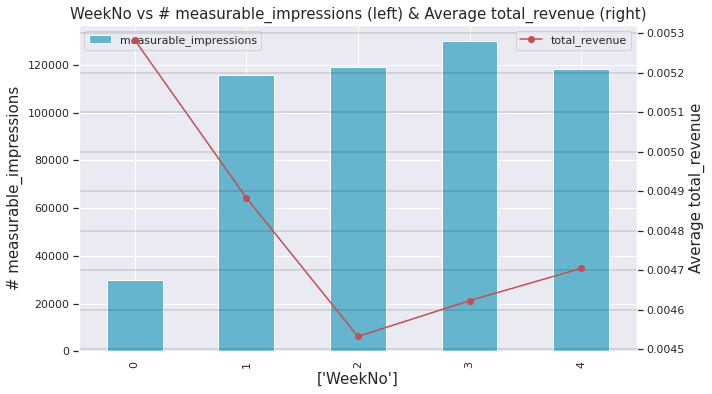

,WeekNo,total_revenue,measurable_impressions
0,22,0.0053,29695
1,23,0.0049,115901
2,24,0.0045,119233
3,25,0.0046,130109
4,26,0.0047,118231


In [16]:
plot_dual_graph(x = ['WeekNo'], y1 = 'total_revenue', y2 = 'measurable_impressions', figsize=(10,6))

Again! As seen above, there was an equal distribution of revenue amount as well as measurable impressions throughout the month (week-wise). But there might be chances we see a trade-off between day vs revenue and/or impression on weekdays/weekends.
<hr/>

##### Weekend-wise
> Let's calculate weekend day using datetime's weekday() method & store them in isWeekend column

In [17]:
ldf_ad_data["is_weekend"] = ldf_ad_data.apply(lambda x: 1 if x["date"].weekday()>5 else 0, axis=1)

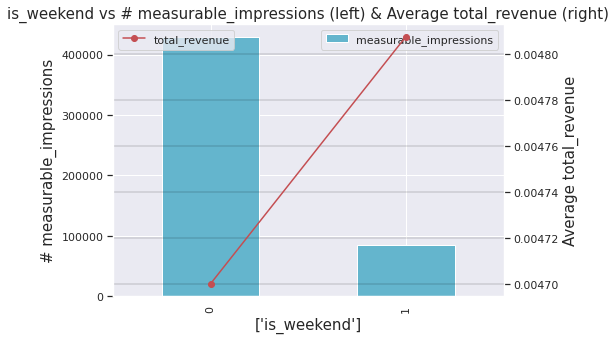

,is_weekend,total_revenue,measurable_impressions
0,0,0.0047,428719
1,1,0.0048,84450


In [18]:
plot_dual_graph(x = ['is_weekend'], y1 = 'total_revenue', y2 = 'measurable_impressions', figsize=(7,5))

In [19]:
ldf_ad_data["is_weekend"].value_counts(normalize=True)

0                 0.8354
1                 0.1646
Name: is_weekend, dtype: float64

`is_weekend` seems to share a varied distribution to the one we have with total_revenue i.e. **83%** data is accumulated on `weekdays`!

<br/><hr/>

### 2.2 EDA of Remaining Variables

#### For this part, let's look at the distribution of all of the features by plotting them

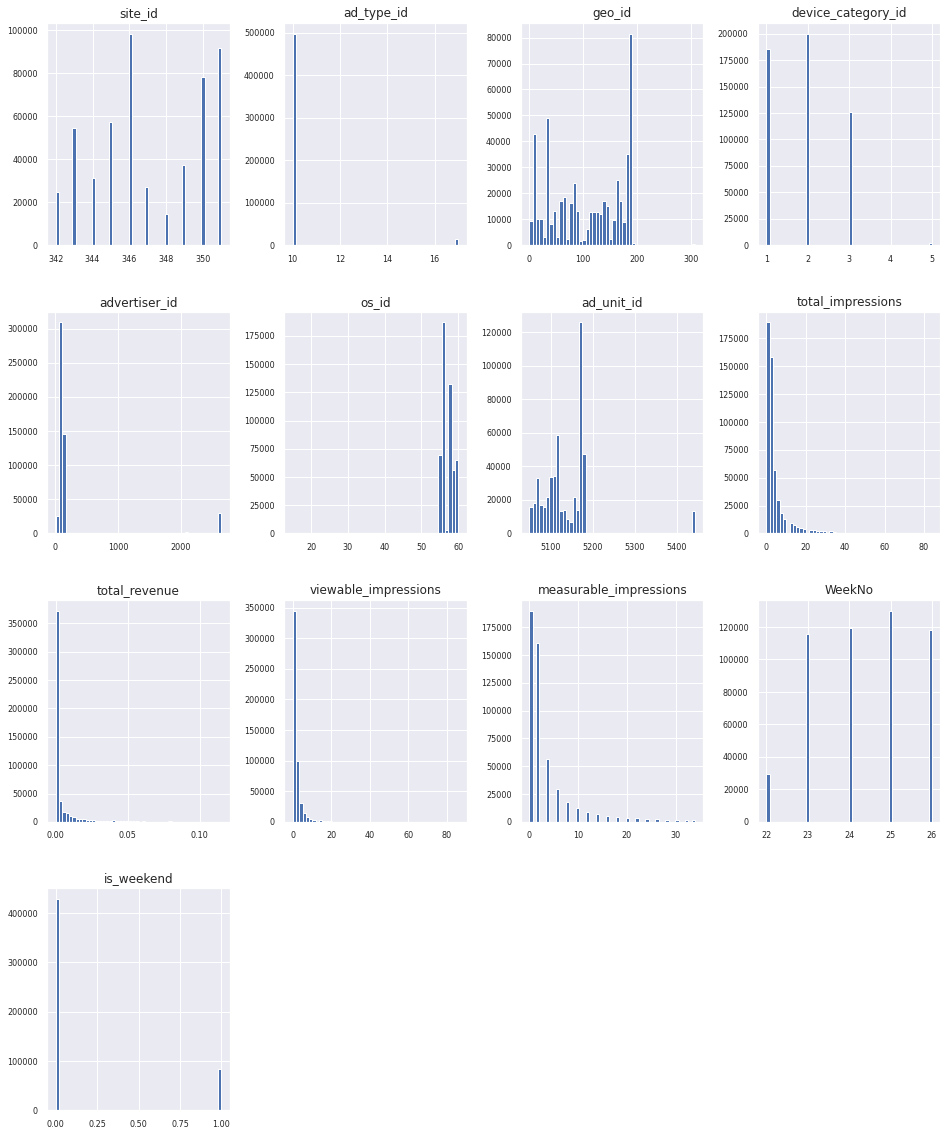

In [20]:
ldf_ad_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Features such as `site_id`, `ad_type_id`, `geo_id`, `device_category_id`, `ad_unit_id`, `week_no` etc. seems to share a similar distribution to the one we have with `total_revenue`.

<hr/>

#### Correlation

Now we'll try to find which features are strongly correlated with `total_revenue`. We'll store them in a var called golden_features_list. We'll reuse our `ldf_ad_data` dataset to do so.

In [21]:
ldf_ad_data_corr = ldf_ad_data.corr()['total_revenue'][:-1] # -1 because the latest row is total_revenue
golden_features_list = ldf_ad_data_corr[abs(ldf_ad_data_corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with total_revenue:\n{}".format(len(golden_features_list), golden_features_list))

There is 5 strongly correlated values with total_revenue:
total_revenue                          1.0000
measurable_impressions                 0.4916
total_impressions                      0.4777
viewable_impressions                   0.3421
geo_id                                 0.1564
Name: total_revenue, dtype: float64


Perfect, we now have a list of strongly correlated values.

Btw, correlation by itself does not always explain the relationship between data, so plotting them could even lead us to new insights and in the same manner, check that our correlated values have a linear relationship to the total_revenue.

For example, relationships such as curvilinear relationships cannot be guessed just by looking at the correlation value so let's take the features we excluded from our correlation table and plot them to see if they show some kind of pattern.

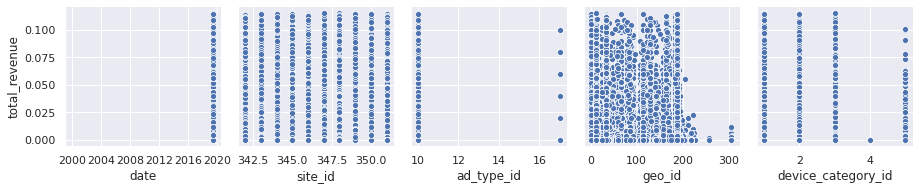

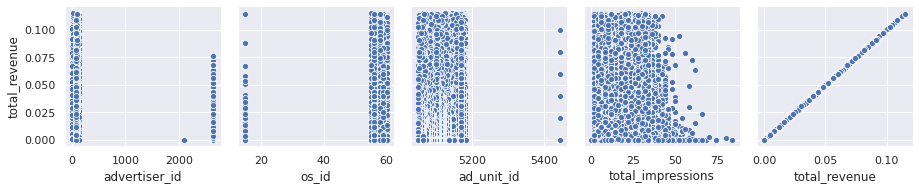

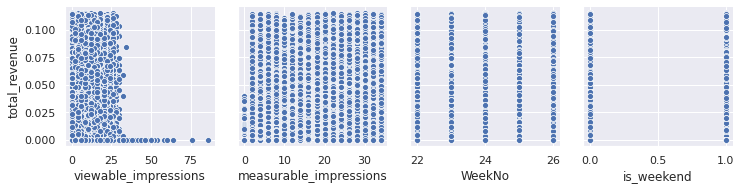

In [22]:
for i in range(0, len(ldf_ad_data.columns), 5):
    sns.pairplot(data=ldf_ad_data,
                x_vars=ldf_ad_data.columns[i:i+5],
                y_vars=['total_revenue'])

#### Conclusion

By looking at correlation, we discovered 11 features that have a strong (or moderate) relationship to revenue.

Variables are as follows:

- site_id
- ad_type_id 
- geo_id
- device_category_id 
- advertiser_id
- os_id
- ad_unit_id
- is_weekend

Also, impression variables are highly correlated (>70%) with total revenue 
- viewable impressions
- measurable impressions
- total  impressions 

<hr/>

# 3. Discussion on the potential revenue range our publisher can make in July

A good revenue model is a proven technique used by digital businesses globally, to generate income from traffic on their website, mobile apps, and via digital channels. [Ref](https://www.smartinsights.com/digital-marketing-strategy/online-business-revenue-models/online-revenue-model-options-internet-business/)

In the following section, we will set some assumptions to calculate the potential revenue range for july month.
1. Background
3. Hypothesis
4. Calculate Revenue Range for July Month
5. Conclusion

<hr/>

### 3.1 Background

##### Understand ad revenue

Advertising revenue is the monetary income that individuals and businesses earn from displaying paid advertisements on their websites, social media channels, or other platforms surrounding their internet-based content. [Ref](https://en.wikipedia.org/wiki/Advertising_revenue) 

##### Is revenue equal to cpm ?
Your revenue will not be equal to your CPM times your views. This is because CPM reflects what advertisers pay, not what you earn. Also, not all views will have ads. [Ref](https://support.google.com/youtube/answer/9314357?hl=en#:~:text=Your%20revenue%20will%20not%20be,all%20views%20will%20have%20ads.)

##### Below are some commonly used parameters:
- measurable_impressions - % inventory - the proportion of ad space sold on sites
- Number of ad units (ad_unit_id)
- CPM - Cost per thousand impressions for ad volume deals

### 3.2 Hypothesis

The assumption is pretty straight forward. We'll consider the sum of revenue & measurable impressions per line item (only those line items whose occurrences are pretty common i.e. at least 5 occurrences). 

The measurable impression denotes the eligible impressions and it is one of the important parameters in revenue.
With that in mind, we will calculate CTR (measurable impression/total impressions). The purpose of calculating CTR that it will change in the future as other categories are pretty static.

So, to forecast revenue, change in CTR will play a vital role.

### 3.3 Algorithm

Step 1. Get sum of total_impressions, measurable_impressions, total_revenue per line item

Step 2. Calculate CTR (CTR = measurable impression / total impression)

Step 3. Drop unnecessary columns and create dummy variables of categorical column

Step 4. Create train-test split

Step 5. Fit the model

Step 6. Predict on testing data

Step 7. Now, using CTR let's create two more columns with boosted & dropped value of CTR by 5%

Step 8. Predict on three values on CTR - Original, Boosted(+5%) & Dropped(-5%)

In [23]:
# Prepare data for modelling.
# Group by line item - sum of total_impressions, measurable_impressions, total_revenue
ldf_grouped_ad_data = ldf_ad_data.groupby(["is_weekend", "site_id","ad_type_id", "geo_id","device_category_id",
                     "advertiser_id","os_id","ad_unit_id"])["total_impressions","measurable_impressions","total_revenue"].sum().reset_index()

# Below is the line item validator dataframe.
# Group by line item - count of any of these -- total_impressions, measurable_impressions, total_revenue
ldf_line_item_validator = ldf_ad_data.groupby(["is_weekend", "site_id","ad_type_id",
                     "geo_id","device_category_id",
                     "advertiser_id","os_id","ad_unit_id"])["total_revenue"].count().to_frame(name = 'count').reset_index()

ldf_grouped_ad_data = ldf_grouped_ad_data.merge(ldf_line_item_validator)

# Select data to be used for modelling i.e. line item combination should be greater than 5
# If count is less, treat them as a noise.
ldf_grouped_ad_data_to_be_modeled = ldf_grouped_ad_data[(ldf_grouped_ad_data['total_impressions']>0)&
                                          (ldf_grouped_ad_data['total_revenue']>0)&
                                         (ldf_grouped_ad_data['count']>5)]

# Store less frequent data in different data-frame
ldf_grouped_ad_data_to_be_ignored_in_modelling = ldf_grouped_ad_data[(ldf_grouped_ad_data['total_impressions']>0)&
                                          (ldf_grouped_ad_data['total_revenue']>0)&
                                         (ldf_grouped_ad_data['count']<=5)]

#### Calculate CTR (CTR = measurable impression / total impression)

In Internet marketing, CTR stands for click-through rate: a metric that measures the number of clicks advertisers receive on their ads per number of impressions.

Achieving a high click-through rate is essential to your PPC success, because it directly affects both your Quality Score and how much you pay every time someone clicks your search ad. [Ref](https://www.wordstream.com/click-through-rate)

In [24]:
ldf_grouped_ad_data_to_be_modeled['CTR'] = ldf_grouped_ad_data_to_be_modeled.apply(lambda x: (x['measurable_impressions']/x['total_impressions'])*100, axis = 1)

#### Drop unnecessary columns and create dummy variables of categorical column

In [25]:
# categorical column
cat_col=['is_weekend',
 'site_id',
 'ad_type_id',
 'geo_id',
 'device_category_id',
 'advertiser_id',
 'os_id',
 'ad_unit_id']

ldf_grouped_ad_data_to_be_modeled = pd.get_dummies(ldf_grouped_ad_data_to_be_modeled, columns=cat_col)
ldf_grouped_ad_data_to_be_modeled = ldf_grouped_ad_data_to_be_modeled.drop(['total_impressions','measurable_impressions','count'], axis=1)

#### Create train-test split

In [26]:
from sklearn.model_selection import train_test_split

X=ldf_grouped_ad_data_to_be_modeled.drop(['total_revenue'], axis=1)
y=ldf_grouped_ad_data_to_be_modeled['total_revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=2)

#### Fit the model

In [27]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)

regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

#### Predict on testing data

In [28]:
y_pred = regr.predict(X_test)
y_pred = np.where(y_pred>0, y_pred, 0)

#### Calculate rmse value

In [29]:
from sklearn.metrics import mean_squared_log_error
print('The rmse of prediction is:', round(mean_squared_log_error(y_pred, y_test) ** 0.5, 5))

The rmse of prediction is: 0.18057


#### Now, using CTR let's create two more columns with boosted & dropped value of CTR by 5%

In [30]:
X_test_with_added_range = X_test.copy()

X_test_with_added_range['CTR_Raised_5%'] = X_test.apply(lambda x: x['CTR']+5 if x['CTR']<=95 else x['CTR'], axis=1)
X_test_with_added_range['CTR_Dropped_5%'] = X_test.apply(lambda x: x['CTR']-5, axis=1)

#### Predict on three values on CTR - Original, Boosted(+5%) & Dropped(-5%)

In [31]:
X_test_with_added_range = X_test.copy()

X_test_with_added_range['CTR'] = X_test.apply(lambda x: x['CTR'] + 5 if x['CTR']<=95 else x['CTR'], axis=1)
llst_predicted_revenue_ctr_raised_5 = regr.predict(X_test_with_added_range)

X_test_with_added_range['CTR'] = X_test.apply(lambda x: x['CTR'] - 5 if x['CTR']>=5 else x['CTR'], axis=1)
llst_predicted_revenue_ctr_dropped_5 = regr.predict(X_test_with_added_range)

X_test_with_added_range['CTR'] = X_test['CTR']
X_test_with_added_range['CTR_Raised_5%'] = X_test.apply(lambda x: x['CTR']+5 if x['CTR']<=95 else x['CTR'], axis=1)
X_test_with_added_range['CTR_Dropped_5%'] = X_test.apply(lambda x: x['CTR']-5, axis=1)
X_test_with_added_range['Predicted_Revenue_CTR'] = regr.predict(X_test)
X_test_with_added_range['Predicted_Revenue_CTR_Raised_5%'] = llst_predicted_revenue_ctr_raised_5
X_test_with_added_range['Predicted_Revenue_CTR_Dropped_5%'] = llst_predicted_revenue_ctr_dropped_5

In [32]:
X_test_with_added_range.tail()

,CTR,is_weekend_0,is_weekend_1,site_id_342,site_id_343,site_id_344,site_id_345,site_id_346,site_id_347,site_id_348,...,ad_unit_id_5178,ad_unit_id_5179,ad_unit_id_5180,ad_unit_id_5181,ad_unit_id_5443,CTR_Raised_5%,CTR_Dropped_5%,Predicted_Revenue_CTR,Predicted_Revenue_CTR_Raised_5%,Predicted_Revenue_CTR_Dropped_5%
42142,100.0000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,100.0000,95.0000,0.1848,0.1848,0.1858
9775,90.9091,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,95.9091,85.9091,0.5443,0.5443,0.5443
57422,100.0000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,100.0000,95.0000,0.0855,0.0855,0.0865
10424,100.0000,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,100.0000,95.0000,0.0855,0.0855,0.0865
1827,96.1538,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,96.1538,91.1538,0.0865,0.0865,0.0865


### 3.4 Forecasting for July Month

In [33]:
print("Actual Revenue in Current Month i.e. June (Test Data): "+str(sum(y_test)))

print("\nPredicted Revenue for Next Month i.e. July (Test Data):")
print("\nRevenue on CTR: "+str(sum(X_test_with_added_range['Predicted_Revenue_CTR'])))
print("Revenue on Boosted CTR: "+str(sum(X_test_with_added_range['Predicted_Revenue_CTR_Raised_5%'])))
print("Revenue on Dropped CTR: "+str(sum(X_test_with_added_range['Predicted_Revenue_CTR_Dropped_5%'])))

Actual Revenue in Current Month i.e. June (Test Data): 488.62939999999946

Predicted Revenue for Next Month i.e. July (Test Data):

Revenue on CTR: 547.5412002547148
Revenue on Boosted CTR: 547.5351821825286
Revenue on Dropped CTR: 549.4178357647615


#### Calculating Percent Growth Rate

The percent change from one period to another is calculated from the formula:

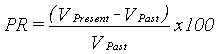

Where:

- PR = Percent Rate
- VPresent = Present or Future Value
- VPast = Past or Present Value

In [34]:
july_growth_rate = (sum(X_test_with_added_range['Predicted_Revenue_CTR_Raised_5%']) - sum(y_test))/sum(y_test)*100
print("Growth Rate: ","%.2f"%july_growth_rate)

Growth Rate:  12.06


### 3.5 Result Summary

#### What is the potential revenue range our publisher can make in July? 

As we can see in the above statements, we have predicted a **12.06%** growth in revenue for July month if we boost CTR by **5%.** Now, on that term, our revenue range for July month will be **488.62 to 547.53** dollars

<hr/>

# 4. Discussion on the reserve prices that he/she can set

A reserve price is a **minimum price** a publisher is willing to accept from an advertiser. In an auction, the publisher is not required to disclose the reserve price to a potential advertiser. If the reserve price is not met, the publisher is not required to sell the item, even to the highest bidder(advertiser). [Ref](https://www.investopedia.com/terms/r/reserve-price.asp#:~:text=A%20reserve%20price%20is%20a,even%20to%20the%20highest%20bidder.)

In the following section, we will set some assumptions to determine the optimal reserve price.
1. Background
3. Hypothesis
4. Determine Optimal Reserve Price
5. Conclusion

<hr/>

### 4.1 Background

Setting a reserve price involves finding the perfect line between ensuring the reserve is high enough to guarantee you a comfortable amount if reached and low enough that it will not be prohibitive to encouraging the bidding on the day. There is a common fear of setting the reserve price too low. [Ref](https://realestateview.com.au/advice/selling/the-ins-and-outs-of-setting-a-reserve-price/)
	
What is a line item in advertising?

Line items contain information about how an ad should show on your website or app, such as when and where specifically to show the ad. Line items also contain details that help an ad reach a specific demographic or audience.

In our context, I believe 1 line items represent as follows: [See 2.2 (Conclusion)]

| Feature | Description |
| -: | :- |
| site_id | denotes a different website
| ad_type_id | can be display ads , video ads, text ads etc
| geo_id | denotes a different country.
| device_category_id | desktop , mobile, tablet
| advertiser_id |  denotes a different bidder in the auction
| os_id | operating system (android, ios etc)
| ad_unit_id | one page can have more than one ad units
| is_weekend | 1 if weekend otherwise; 0

### 4.2 Hypothesis

The assumptions that I have kept in mind to determine optimal reserve price is based on CPM. CPM shares a linear relationship with 'bids' or 'price'. It is calculated as revenue/impressions * 1000.
In simple terms, CPM represents  'bids' or 'price'. In that way, we can determine, what is the price for winning a bid of a particular line item by looking at the CPM. 

### 4.3 Determine Optimal Reserve Price

Step 1. Get total measusable_impressions & total_revenue per line item i.e. group by above features and get sum(measusable_impressions) & sum(total_revenue)

Step 2. Now, we will apply the CPM formula on newly created columns and create a new column which is CPM.

In [35]:
ldf_grouped_ad_data = ldf_ad_data.groupby(["is_weekend", "site_id","ad_type_id",
                     "geo_id","device_category_id",
                     "advertiser_id","os_id","ad_unit_id"])["measurable_impressions","total_revenue"].sum().reset_index()

In [36]:
ldf_grouped_ad_data.shape

(91574, 10)

In [37]:
ldf_grouped_ad_data.describe()

,is_weekend,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,os_id,ad_unit_id,measurable_impressions,total_revenue
count,"91,574.0000","91,574.0000","91,574.0000","91,574.0000","91,574.0000","91,574.0000","91,574.0000","91,574.0000","91,574.0000","91,574.0000"
mean,0.3378,346.7380,10.2279,101.8062,1.9437,275.6568,57.1691,"5,132.2748",20.5490,0.0264
std,0.4729,2.8976,1.2425,60.4044,0.8028,643.7672,2.2161,64.6270,140.6948,0.1904
min,0.0000,342.0000,10.0000,1.0000,1.0000,8.0000,15.0000,"5,050.0000",0.0000,0.0000
25%,0.0000,345.0000,10.0000,46.0000,1.0000,79.0000,56.0000,"5,097.0000",0.0000,0.0000
50%,0.0000,346.0000,10.0000,99.0000,2.0000,90.0000,57.0000,"5,119.0000",2.0000,0.0000
75%,1.0000,349.0000,10.0000,160.0000,3.0000,139.0000,58.0000,"5,168.0000",8.0000,0.0036
max,1.0000,351.0000,17.0000,308.0000,5.0000,"2,646.0000",60.0000,"5,443.0000","17,820.0000",23.0186


#### Calculate CPM - Cost Per Mille

In [38]:
def calculate_cpm(n, d):
    """
    CPM – cost per Mille. This is one of the most important ways to measure 
    performance. It is. Calculated as revenue/impressions * 1000. 'bids' and 'price' are 
    measured in terms of CPM
    """
    return (n / d)*1000 if d else 0

In [39]:
ldf_grouped_ad_data['cpm/reserve_price'] = ldf_grouped_ad_data.apply(lambda x: calculate_cpm(((x['total_revenue'])),x['measurable_impressions']) , axis=1)

In [40]:
ldf_grouped_ad_data.describe()

,is_weekend,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,os_id,ad_unit_id,measurable_impressions,total_revenue,cpm/reserve_price
count,"91,574.0000","91,574.0000","91,574.0000","91,574.0000","91,574.0000","91,574.0000","91,574.0000","91,574.0000","91,574.0000","91,574.0000","91,574.0000"
mean,0.3378,346.7380,10.2279,101.8062,1.9437,275.6568,57.1691,"5,132.2748",20.5490,0.0264,0.5687
std,0.4729,2.8976,1.2425,60.4044,0.8028,643.7672,2.2161,64.6270,140.6948,0.1904,1.4160
min,0.0000,342.0000,10.0000,1.0000,1.0000,8.0000,15.0000,"5,050.0000",0.0000,0.0000,0.0000
25%,0.0000,345.0000,10.0000,46.0000,1.0000,79.0000,56.0000,"5,097.0000",0.0000,0.0000,0.0000
50%,0.0000,346.0000,10.0000,99.0000,2.0000,90.0000,57.0000,"5,119.0000",2.0000,0.0000,0.0000
75%,1.0000,349.0000,10.0000,160.0000,3.0000,139.0000,58.0000,"5,168.0000",8.0000,0.0036,0.5000
max,1.0000,351.0000,17.0000,308.0000,5.0000,"2,646.0000",60.0000,"5,443.0000","17,820.0000",23.0186,52.2000


### 4.4 Result Summary

As compared to the bid value in real life, here the derived reserve prices justify the minimum amount publisher should set to lose at lower bids, which encourage higher bidding and more publisher revenue.

As we can see in the above table, most of the time, bidding prices are reasonably close to **30-50 cents**. This means the assumptions we have kept in mind could be correct.

<hr/>

# 5. Conclusion

Digital markets are playing catch-up compared to some other industries when it comes to AI. There is a lot to gain from an AI-first world. The proposed solution has the potential to provide benefits to publishers.

Here are some points which may provide the concrete direction to the research we held:
- line_item_type_id could provide a basis for selecting the combination of features. But as stated in the problem statement, we have ignored it.
- Also, boosting or dropping in CTR value resulted in an almost 12% growth rate, makes me think what if we could calibrate the impressions itself and see the trade-off in growth rate. Calibration in terms of actual value could make a big difference in CTR and later on in revenue.

Due to time constraints, I couldn't try all possible combinations but this study may, later on, provide a good basis for forecasting research.

Here I would like to highlight some points to align my thoughts:
- Quantum of data- There was only one month of data was given to forecasting the solution, which I believe is less to support the pieces of evidence I present.
- Lack of Time- The solution is built in 2 straight days. Having said this, expertise in analytics & tools/libraries such as python, pandas, Jupyter Notebook paced the progress. Also, if we improve the base for the domain knowledge that would save some time.


<center><h1>End Here</h1></center>